# Optimizing Solar Rooftop Installations in Grenada:  A Data Driven Approach

**Group 6 - Anuhya Abhiram Kandoor, Deepika Bangari, Goutham Mandla, Innocent Bestover Makoko, Shubham Manoj Gengaje**


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Dataset Description -**

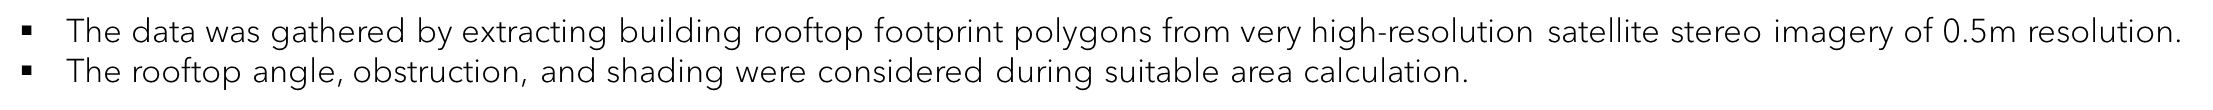

# INITIAL ANALYSIS

In [1]:
import pandas as pd

In [2]:
#Importing the csv file
df = pd.read_csv('grenada_rooftop_solar_potential.csv')
df.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844427,NaN
1,00978f18-5dea-4892-9c6c-2dccc1c96152,Grenada,20.51,9.28,1.80,2223.33,Single-family residential,30.28,144.52,1234.50,3.978232759,NaN
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159303,NaN
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.0870961,NaN
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582704975,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51115 entries, 0 to 51114
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        51115 non-null  object 
 1   City                        51115 non-null  object 
 2   Surface_area                51115 non-null  float64
 3   Potential_installable_area  51115 non-null  float64
 4   Peak_installable_capacity   51115 non-null  float64
 5   Energy_potential_per_year   51115 non-null  float64
 6   Assumed_building_type       51115 non-null  object 
 7   Estimated_tilt              51115 non-null  float64
 8   Estimated_building_height   49642 non-null  float64
 9   Estimated_capacity_factor   50476 non-null  float64
 10  Unit_installation_price     51115 non-null  object 
 11  Comment                     0 non-null      float64
dtypes: float64(8), object(4)
memory usage: 4.7+ MB


In [4]:
print(df.shape)

(51115, 12)


In [5]:
#Since Comment column is not necessary in our data analysis, we are dropping the column
df = df.drop(["Comment"], axis = 1)

In [6]:
print(df.shape)

(51115, 11)


In [7]:
#Changing the data type of the column 'Unit_installation_price' from object to float
df['Unit_installation_price'] = pd.to_numeric(df['Unit_installation_price'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51115 entries, 0 to 51114
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        51115 non-null  object 
 1   City                        51115 non-null  object 
 2   Surface_area                51115 non-null  float64
 3   Potential_installable_area  51115 non-null  float64
 4   Peak_installable_capacity   51115 non-null  float64
 5   Energy_potential_per_year   51115 non-null  float64
 6   Assumed_building_type       51115 non-null  object 
 7   Estimated_tilt              51115 non-null  float64
 8   Estimated_building_height   49642 non-null  float64
 9   Estimated_capacity_factor   50476 non-null  float64
 10  Unit_installation_price     50476 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.3+ MB


# EXPLORATORY DATA ANALYSIS

# Step 1 - Handling Missing values 

In [9]:
# checking if there are any missing values in our dataset or not
df.isnull().sum()

uuid                             0
City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height     1473
Estimated_capacity_factor      639
Unit_installation_price        639
dtype: int64

**From the above output, we see that there are 1473 missing values for Estimated_building_height, 639 missing values for each of  Estimated_capacity_factor and Unit_installation_price.**

In [10]:
#Dropping all the rows which have missing values because the columns Estimated_building_height, 
#Estimated_capacity_factor and Unit_installation_price cannot be filled with any arbitrary values.
df = df.dropna(axis = 0, how ='any')

#Rechecking our data for missing values or null values count
print(df.isnull().sum())

#Checking the number of rows and columns
df.shape

uuid                          0
City                          0
Surface_area                  0
Potential_installable_area    0
Peak_installable_capacity     0
Energy_potential_per_year     0
Assumed_building_type         0
Estimated_tilt                0
Estimated_building_height     0
Estimated_capacity_factor     0
Unit_installation_price       0
dtype: int64


(49026, 11)

**After dealing with missing values, we have a dataset of size 49026 x 11**

# Step 2 - Detecting Outliers

In [11]:
#After handling missing values, we are now checking for Outliers in our dataset using the Z-score statistical test
from scipy.stats import zscore

In [12]:
# Select the columns containing numeric data for outlier detection
numeric_cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price']

# Calculate z-scores for the selected columns
z_scores = zscore(df[numeric_cols])

# Create a DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

# Defining a threshold for identifying outliers (commonly z-score threshold of 2 or -2 is used). But we used 3 because of the
#size of our dataset
threshold = 3

# Create a mask for outliers based on the threshold
outlier_mask = (z_scores_df > threshold) | (z_scores_df < -threshold)

In [13]:
# Extract rows with outliers and create a dataframe with the outliers datarows
outliers = df[outlier_mask.any(axis=1)]
outliers

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price
1,00978f18-5dea-4892-9c6c-2dccc1c96152,Grenada,20.51,9.28,1.80,2223.33,Single-family residential,30.28,144.52,1234.50,3.978233
10,d48fb447-f8a9-4b6d-862b-e29df9e1a6d7,Grenada,259.87,115.80,22.47,30289.94,Single-family residential,21.47,84.25,1348.30,50.425552
24,0bfce820-e03a-4094-ad2e-2236d752ffa6,Grenada,42.03,22.51,4.37,5293.65,Single-family residential,36.59,0.00,1212.00,8.159534
25,714e0f03-4171-405e-9d89-49670c915f05,Grenada,77.39,45.25,8.78,9910.89,Single-family residential,40.42,0.00,1129.00,15.016225
31,812b3668-6bd0-4af6-8f2f-7031df903a65,Grenada,18.05,4.39,0.85,967.58,Commercial,30.96,8.48,1137.00,3.494875
...,...,...,...,...,...,...,...,...,...,...,...
50083,cdf4294f-3ea8-40a8-a768-c13b768137b7,Grenada,456.37,341.30,66.21,105011.13,Schools,9.03,3.65,1586.00,88.532838
50230,47f368bc-685c-4784-98a3-e951adcfe23f,Grenada,713.95,519.98,100.88,151343.70,Schools,15.04,5.54,1500.29,138.511627
50658,8f6945df-8c90-4bdd-b048-d4ddfac112a8,Grenada,590.83,327.92,63.62,98352.11,Single-family residential,14.82,9.79,1546.00,114.627362
51055,c555dd38-b729-4de3-aed9-83859a6e2010,Grenada,934.84,662.46,128.52,169513.23,Schools,20.50,11.47,1319.00,181.362855


**Since all the outliers identified in the above step are other outliers and not true outliers, we can remove all the identified outlier rows from the dataframe.**

In [14]:
#Extract rows with outliers and create a dataframe with the outliers datarows
df1 = df[~outlier_mask.any(axis=1)]
df1

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.087096
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582705
5,150ccd3a-939b-4a9e-9101-629a0120fbf5,Grenada,102.85,61.35,11.90,16216.01,Single-family residential,19.60,14.39,1362.37,19.949715
...,...,...,...,...,...,...,...,...,...,...,...
51109,6334e6c5-ff0b-4177-ade5-d719650aed35,Grenada,27.74,13.14,2.55,3525.40,Single-family residential,17.91,2.71,1383.00,5.383333
51110,7be87ad9-678c-4d1e-8309-cfe14f9feb1f,Grenada,73.03,40.83,7.92,12284.92,Single-family residential,14.98,16.11,1550.99,14.165996
51111,fb8425b4-b412-40da-b901-542267af7797,Grenada,67.71,35.51,6.88,10228.88,Single-family residential,17.66,26.81,1486.16,13.118693
51112,ad5bba3f-392b-436d-a4dc-d1bd7e3053c4,Grenada,66.32,30.61,5.94,9181.37,Single-family residential,18.99,4.26,1546.02,12.869677


**After dealing with outliers, we have a dataset of size 47835 x 11**

# Step 3 - Encoding our categorical features

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder to handle categorical data
le = LabelEncoder()

# Encode the 'Assumed_building_type' column
df1.loc[:, 'Assumed_building_type_encoded'] = le.fit_transform(df1['Assumed_building_type'])

C:\Users\anual\AppData\Local\Temp\ipykernel_18912\3455942846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Assumed_building_type_encoded'] = le.fit_transform(df1['Assumed_building_type'])


In [16]:
df1.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Assumed_building_type_encoded
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844,7
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159,7
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.087096,7
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582705,7
5,150ccd3a-939b-4a9e-9101-629a0120fbf5,Grenada,102.85,61.35,11.90,16216.01,Single-family residential,19.60,14.39,1362.37,19.949715,7


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47835 entries, 0 to 51113
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           47835 non-null  object 
 1   City                           47835 non-null  object 
 2   Surface_area                   47835 non-null  float64
 3   Potential_installable_area     47835 non-null  float64
 4   Peak_installable_capacity      47835 non-null  float64
 5   Energy_potential_per_year      47835 non-null  float64
 6   Assumed_building_type          47835 non-null  object 
 7   Estimated_tilt                 47835 non-null  float64
 8   Estimated_building_height      47835 non-null  float64
 9   Estimated_capacity_factor      47835 non-null  float64
 10  Unit_installation_price        47835 non-null  float64
 11  Assumed_building_type_encoded  47835 non-null  int32  
dtypes: float64(8), int32(1), object(3)
memory usage: 4.

# Step 4 - Performing Correlation Analysis

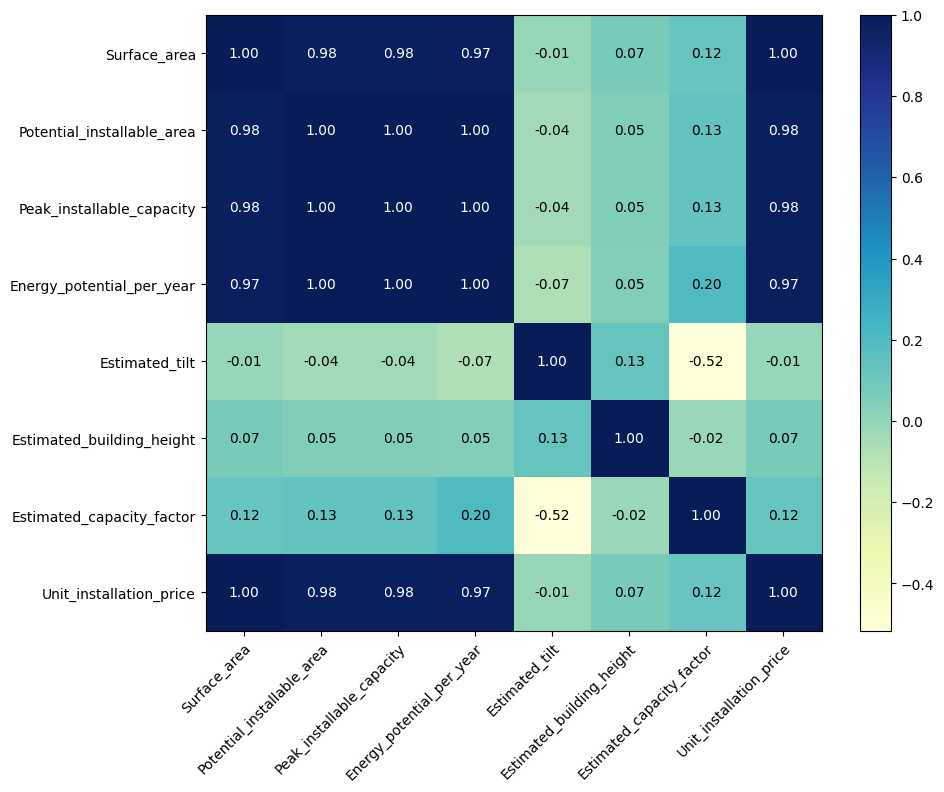

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import numpy as np
from mlxtend.plotting import heatmap

#cols = df1.columns 
# List of colmuns of dataframe df1
cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price']

# Calculate Pearson correlation
cm = np.corrcoef(df1[cols].values.T) 
hm = heatmap(cm, figsize=(10,8), row_names=cols, column_names=cols, cmap="YlGnBu") # ,!Represent correlation by a heat map
plt.show()

**Our correlation matrix heatmap gives us the following insights -**
1. Our target variable i.e., Energy_potential_per_year shows a high correlation of **1.00** with the features Potential_installable_area, Peak_installable_capacity.

2. Our target variable i.e., Energy_potential_per_year shows a high correlation of **0.97** with the features Surface_area and Unit_installation_price.

**Since the correlation with the target variable is same as 1.00, there is no use considering those features for our analysis. Henceforth, we are not considering those features anywhere.**

# CHECKING FOR MULTICOLLINEARITY

In [19]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df1[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [20]:
# features to consider removing

considered_features = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price']
# compute vif 
compute_vif(considered_features).sort_values('VIF')

#high_vif_features = vif_all[vif_all > 5]
#print(f"Features with high VIF (> 5): {high_vif_features.index.tolist()}")

C:\Users\anual\AppData\Local\Temp\ipykernel_18912\786379704.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
4,Estimated_building_height,1.038572e+00
5,Estimated_capacity_factor,1.392710e+00
3,Estimated_tilt,1.410783e+00
0,Surface_area,2.043117e+07
6,Unit_installation_price,2.043192e+07
1,Potential_installable_area,2.770005e+07
2,Peak_installable_capacity,2.770092e+07


**Our Variance Influence Factor(VIF) also indicates that since the features Potential_installable_area, Peak_installable_capacity, Surface_area and Unit_installation_price have a VIF greater than 1, it explains there is high multicollinearity amongst the features. Henceforth, we are not considering those features anywhere.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# FEATURE GENERATION -

**Since we have no features correlating with the target variable, we need to add more features which align with the theoretical concept of solar power generation. In accordance to that, we have identified the following features to be added for our analysis. They are -**
1. No_of_panels
2. Estimated_capacity_factor_%
3. estimated_width
4. estimated_length
5. estimated_aspect_ratio

**All of these features are added after doing a lot of research on what features can help with our analysis. References are mentioned in the end of the notebook.**

In [21]:
df1.loc[:,'no_of_panels'] = round(df1['Potential_installable_area']/15)

C:\Users\anual\AppData\Local\Temp\ipykernel_18912\397801443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'no_of_panels'] = round(df1['Potential_installable_area']/15)


In [22]:
df1.loc[:,'Estimated_capacity_factor_%'] = df1['Estimated_capacity_factor']/100

C:\Users\anual\AppData\Local\Temp\ipykernel_18912\3131592950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'Estimated_capacity_factor_%'] = df1['Estimated_capacity_factor']/100


In [23]:
df1.loc[:,'estimated_width'] = df1['Potential_installable_area']/df1['Surface_area']
df1.loc[:,'estimated_length'] = df1['Surface_area']/df1['estimated_width']
df1.loc[:,'estimated_aspect_ratio'] = (df1['estimated_width']/df1['estimated_length'])*100

C:\Users\anual\AppData\Local\Temp\ipykernel_18912\255500081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'estimated_width'] = df1['Potential_installable_area']/df1['Surface_area']
C:\Users\anual\AppData\Local\Temp\ipykernel_18912\255500081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'estimated_length'] = df1['Surface_area']/df1['estimated_width']
C:\Users\anual\AppData\Local\Temp\ipykernel_18912\255500081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47835 entries, 0 to 51113
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           47835 non-null  object 
 1   City                           47835 non-null  object 
 2   Surface_area                   47835 non-null  float64
 3   Potential_installable_area     47835 non-null  float64
 4   Peak_installable_capacity      47835 non-null  float64
 5   Energy_potential_per_year      47835 non-null  float64
 6   Assumed_building_type          47835 non-null  object 
 7   Estimated_tilt                 47835 non-null  float64
 8   Estimated_building_height      47835 non-null  float64
 9   Estimated_capacity_factor      47835 non-null  float64
 10  Unit_installation_price        47835 non-null  float64
 11  Assumed_building_type_encoded  47835 non-null  int32  
 12  no_of_panels                   47835 non-null  floa

In [25]:
df1.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Assumed_building_type_encoded,no_of_panels,Estimated_capacity_factor_%,estimated_width,estimated_length,estimated_aspect_ratio
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844,7,2.0,12.7975,0.516077,97.020313,0.531927
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159,7,2.0,12.9911,0.540653,84.397929,0.640600
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.087096,7,1.0,13.3000,0.458347,68.354380,0.670545
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582705,7,1.0,13.4255,0.496175,57.963392,0.856015
5,150ccd3a-939b-4a9e-9101-629a0120fbf5,Grenada,102.85,61.35,11.90,16216.01,Single-family residential,19.60,14.39,1362.37,19.949715,7,4.0,13.6237,0.596500,172.422535,0.345952


In [26]:
df1.shape

(47835, 17)

**After adding our features, we have 17 columns. Since, we have newer features, we need to perform a correlation analysis on these features.**

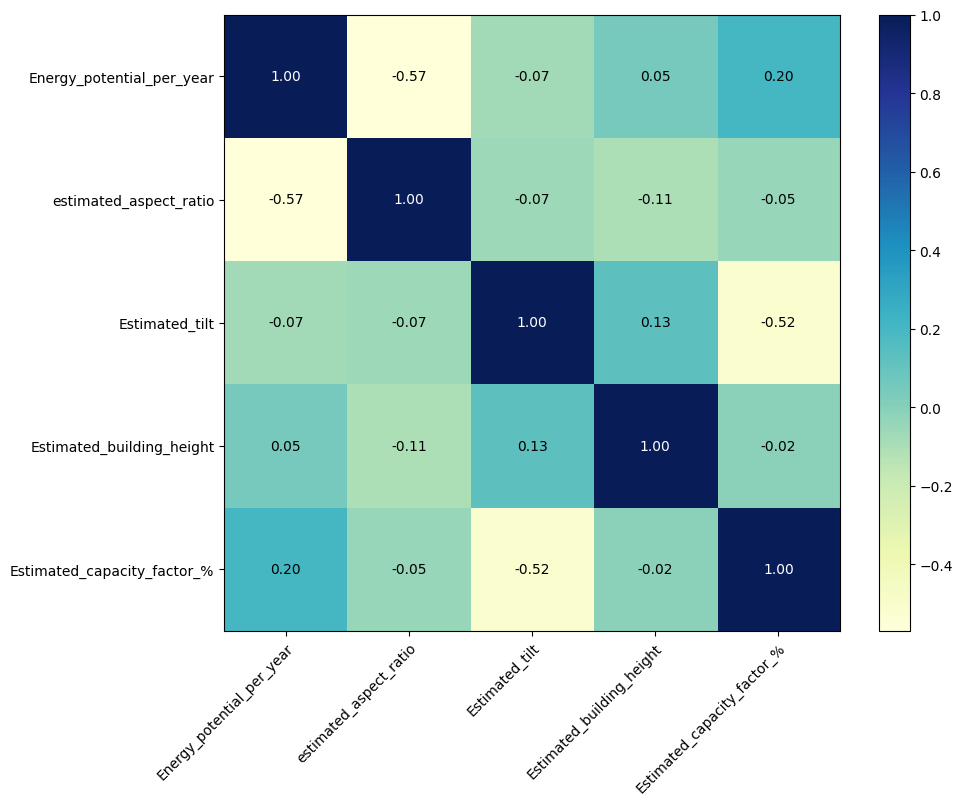

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import numpy as np
from mlxtend.plotting import heatmap

cols = ['Energy_potential_per_year', 'estimated_aspect_ratio', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor_%']

cm = np.corrcoef(df1[cols].values.T) # Calculate Pearson correlation
hm = heatmap(cm, figsize=(10,8), row_names=cols, column_names=cols, cmap="YlGnBu") # ,!Represent correlation by a heat map
plt.show()

Now, we have a moderate negative correlation of **0.57 with estimated_aspect_ratio** and postive correlation of **0.20 with Estimated_capacity_factor_%.** Hence, for our research, we will consider these features further on.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# LASSO REGULARIZATION

In [28]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Split data into training and validation sets
features_train, features_val, target_train, target_val = train_test_split(
    df1[['estimated_aspect_ratio','Estimated_capacity_factor_%']], 
    df1[ 'Energy_potential_per_year'],
    test_size=0.2,
    random_state=42,
)

# Define a range of alpha values for grid search
alpha_grid = {"alpha": [750]}

# Instantiate Lasso model and grid search
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=alpha_grid, scoring="r2")

# Fit grid search on training data
grid_search.fit(features_train, target_train)

# Get best model and alpha
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

# Print optimal alpha and train model with it
print(f"Optimal alpha: {best_alpha}")
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(features_train, target_train)

# Analyze model coefficients
print(f"Coefficients: {lasso_model.coef_}")

# Evaluate model performance on validation set
predictions = lasso_model.predict(features_val)
r2 = r2_score(target_val, predictions)
print(f"R-squared on validation data: {r2}")

Optimal alpha: 750
Coefficients: [-21999.58326626   1919.45866933]
R-squared on validation data: 0.30695633449675264


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# RESEARCH PROBLEM 1 -

**How can we optimize solar rooftop installations in Grenada to maximize energy generation while considering building types and rooftop characteristics?**

Now that we have performed EDA, checked for multicollinearity, and used Lasso regularization, we are going to run different regression algorithms on our selected features **i.e., estimated_aspect_ratio and estimated_capacity_factor_%.** 

**STEP 1 - CHOOSING THE BEST FIT MODEL**

In [31]:
##Importing the necessary basic libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity


**a. Linear Regression**

Results for Linear Regression - 

Building type: Commercial
MSE: 391172275.5883
MAE: 14362.3315
R2 score for train set: 0.3977156639609907
R2 score for test set: 0.3563


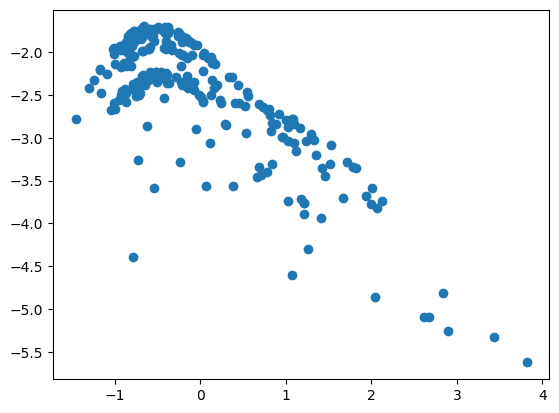

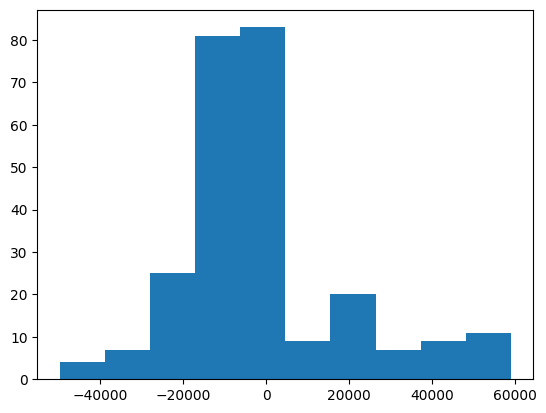



Building type: Hotels
MSE: 449530105.2753
MAE: 15381.3745
R2 score for train set: 0.3007357001395655
R2 score for test set: 0.2943


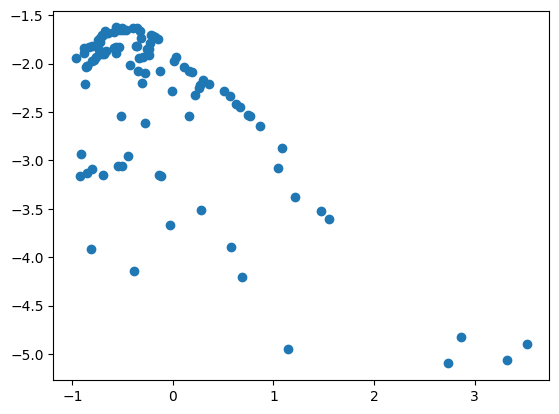

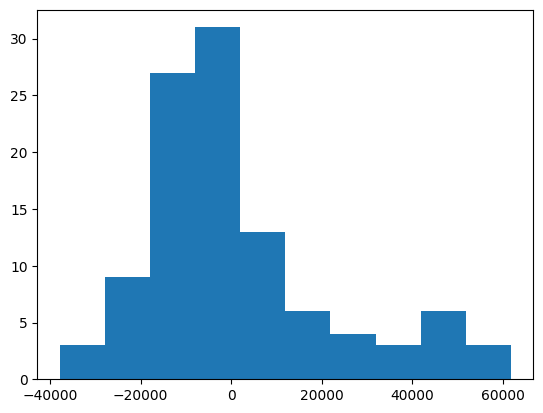



Building type: Industrial
MSE: 285501523.7306
MAE: 12668.6001
R2 score for train set: 0.3492952633390518
R2 score for test set: 0.3164


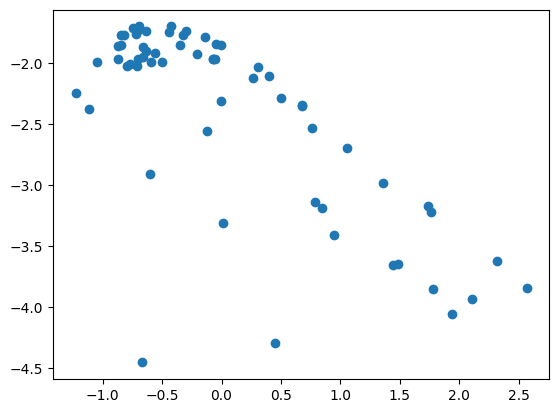

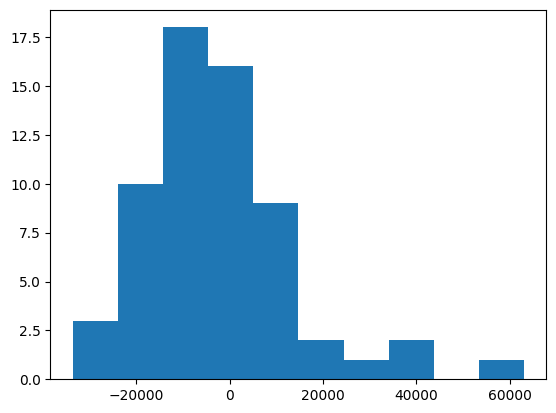



Building type: Multi-family residential
MSE: 261939283.8826
MAE: 11570.3915
R2 score for train set: 0.3835314129407579
R2 score for test set: 0.4085


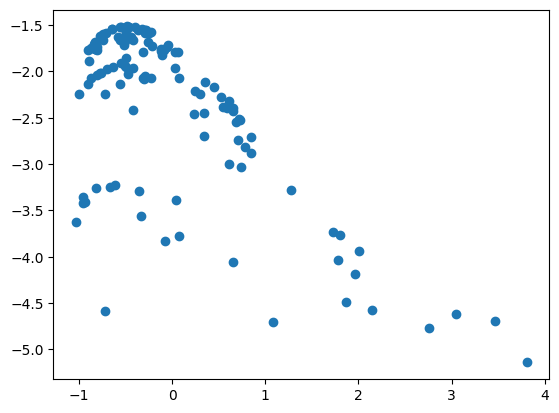

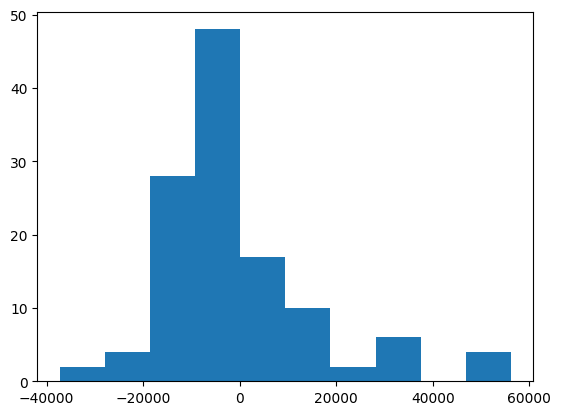



Building type: Public
MSE: 285295429.3298
MAE: 12718.4316
R2 score for train set: 0.35428360574819795
R2 score for test set: 0.4185


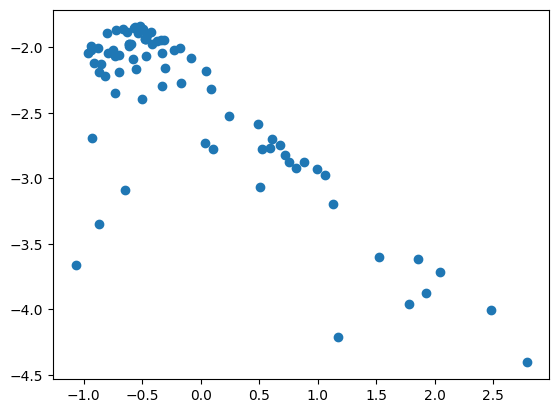

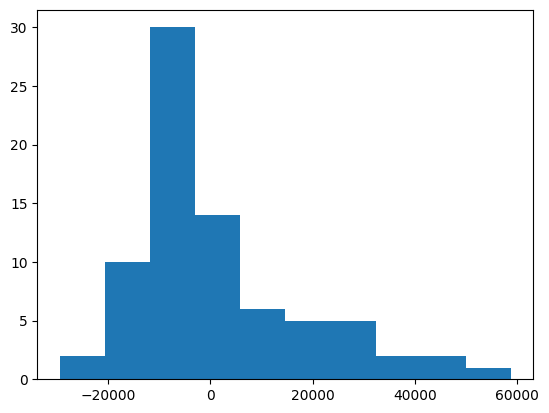



Building type: Public health facilities
MSE: 236316396.7524
MAE: 8824.6520
R2 score for train set: 0.3894263708749244
R2 score for test set: 0.3750


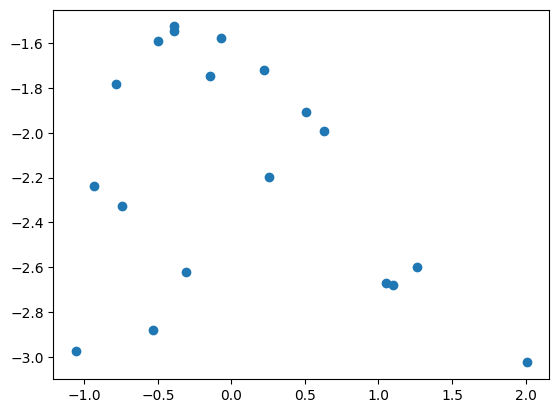

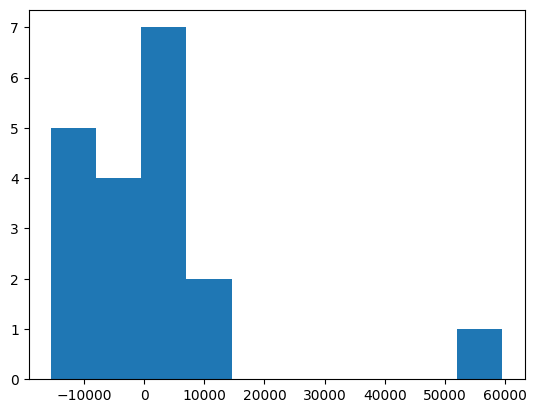



Building type: Schools
MSE: 329659944.2456
MAE: 14447.2039
R2 score for train set: 0.41573737442400904
R2 score for test set: 0.5298


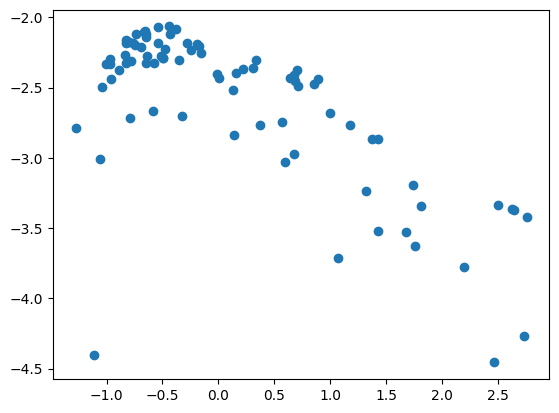

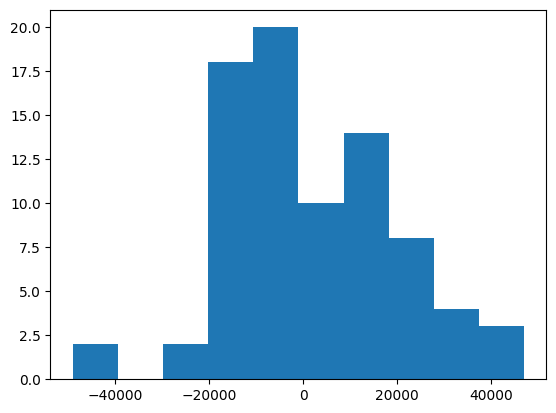



Building type: Single-family residential
MSE: 118320992.6031
MAE: 7152.1497
R2 score for train set: 0.35853921863287996
R2 score for test set: 0.3544


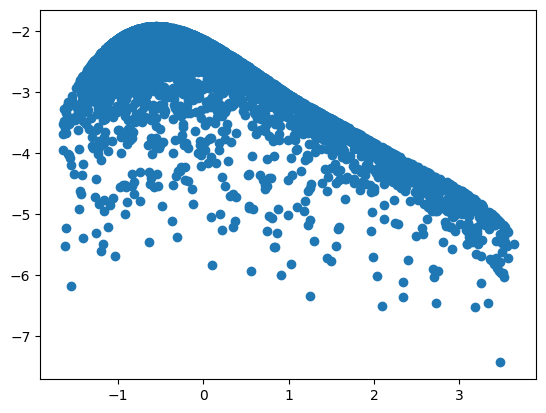

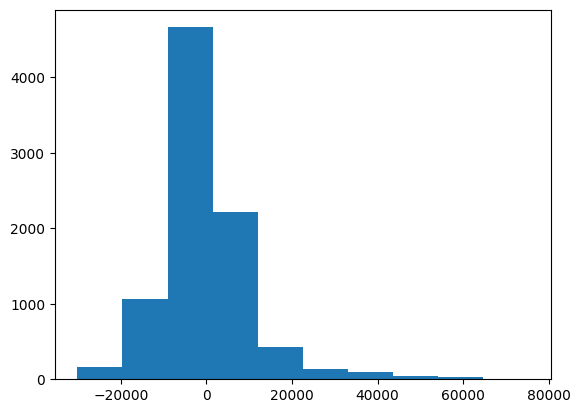

In [32]:
# Model selection and training
from sklearn.linear_model import LinearRegression

#Grouping by the different building types
grouped_by_building_type = df1.groupby('Assumed_building_type')

print("Results for Linear Regression - \n")
# Optimization for each building type
for building_type, group in grouped_by_building_type:
    # Selecting relevant features
    features = ['estimated_aspect_ratio','Estimated_capacity_factor_%']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model performance
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, model.predict(X_train))

    # Print the statistics for the model
    print(f"Building type: {building_type}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 score for train set: {r2_train}")
    print(f"R2 score for test set: {r2:.4f}")
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Estimate the KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_test)
    log_dens = kde.score_samples(X_test)

    # Plot the KDE and data points
    plt.scatter(X_test[:, 0], log_dens)
    plt.show()

    # Plot the residuals
    plt.hist(residuals)
    plt.show()
    
    print("\n")

**b. Support Vector for Regression (SVR)**

Results for SVR - 

Building type: Commercial
Mean Squared Error: 636664730.5930383
MAE: 17407.1219
R^2 score for train set: -0.052055337443062344
R^2 score for test set: -0.04761089939558549


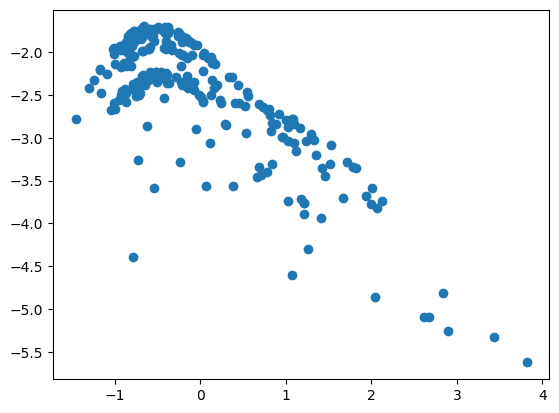

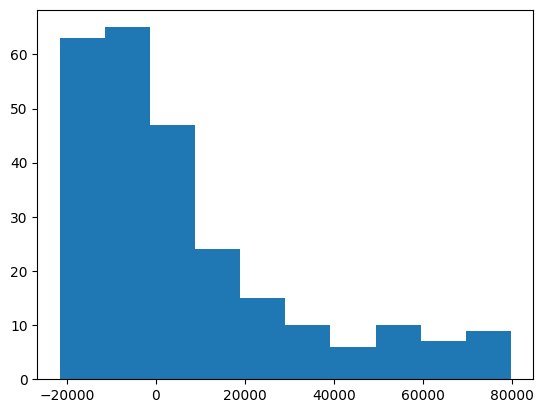



Building type: Hotels
Mean Squared Error: 734492938.103351
MAE: 19302.8501
R^2 score for train set: -0.0908347555390896
R^2 score for test set: -0.15309856299236335


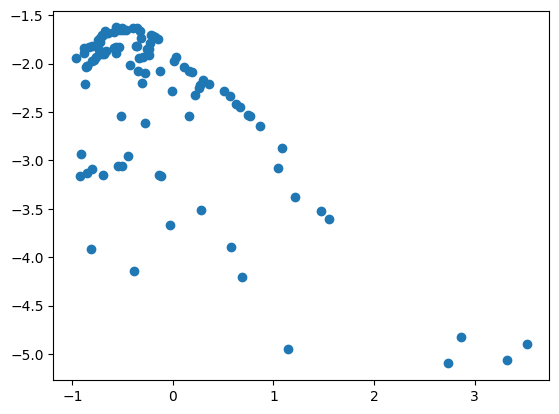

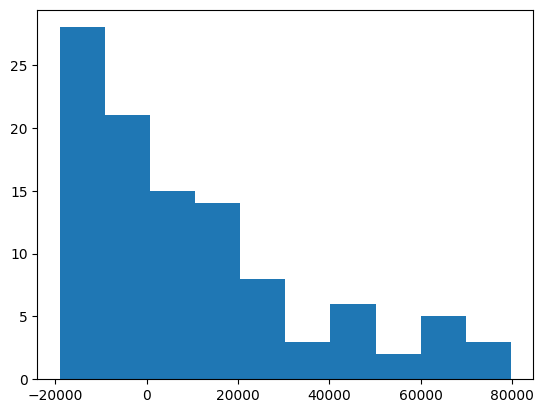



Building type: Industrial
Mean Squared Error: 431642624.92654294
MAE: 13785.4905
R^2 score for train set: -0.11350656055011421
R^2 score for test set: -0.03350705194674353


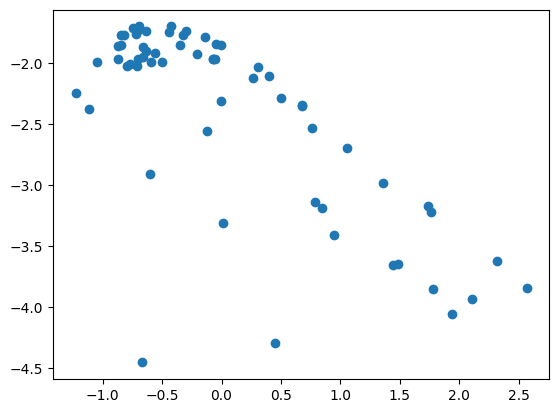

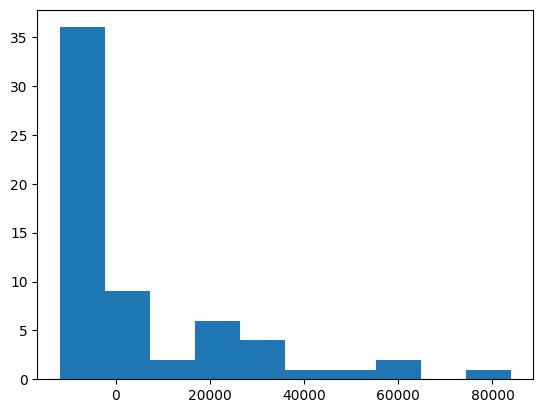



Building type: Multi-family residential
Mean Squared Error: 483794924.2670567
MAE: 15831.9277
R^2 score for train set: -0.08944707826662057
R^2 score for test set: -0.09254547668784685


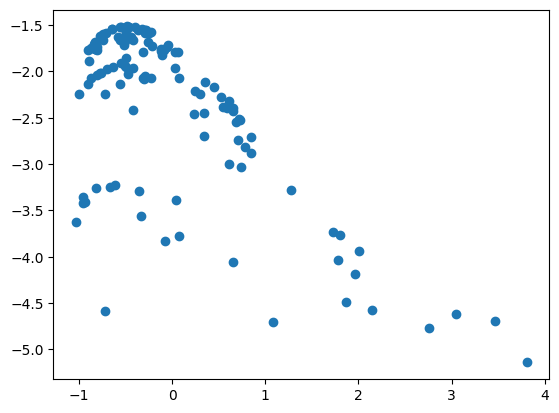

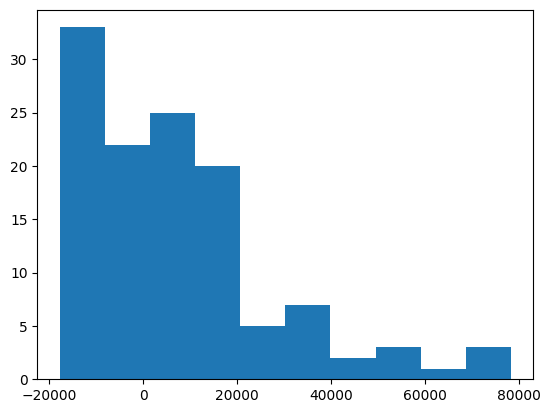



Building type: Public
Mean Squared Error: 541782287.7731028
MAE: 17025.2154
R^2 score for train set: -0.057743719850381625
R^2 score for test set: -0.1043623398265523


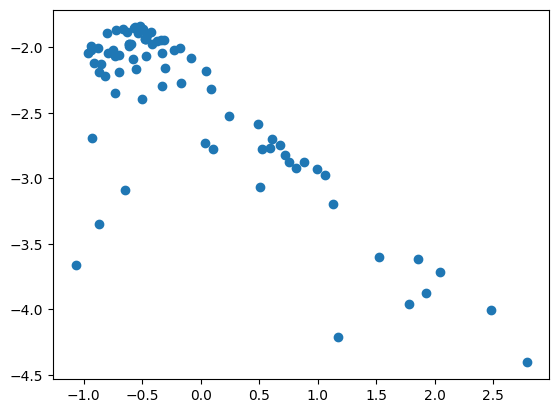

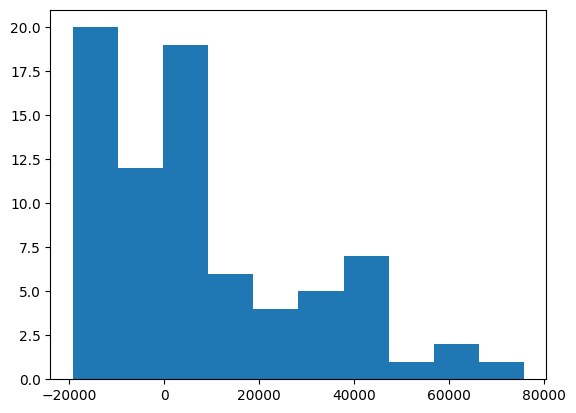



Building type: Public health facilities
Mean Squared Error: 377517401.6498011
MAE: 13165.0272
R^2 score for train set: -0.00451559523985412
R^2 score for test set: 0.0015772359159302862


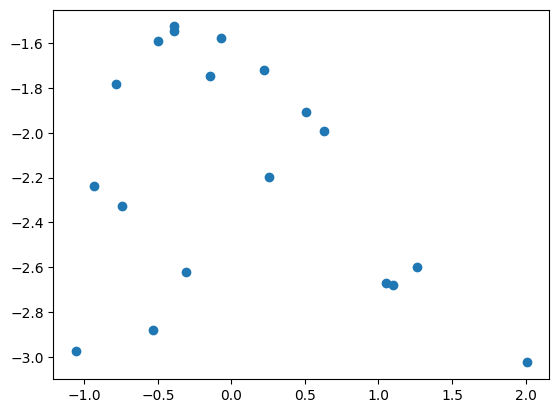

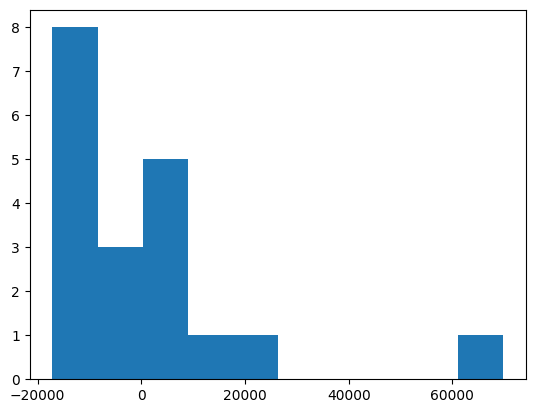



Building type: Schools
Mean Squared Error: 726713896.0303977
MAE: 21761.4349
R^2 score for train set: -0.08044961168453701
R^2 score for test set: -0.0365891277874697


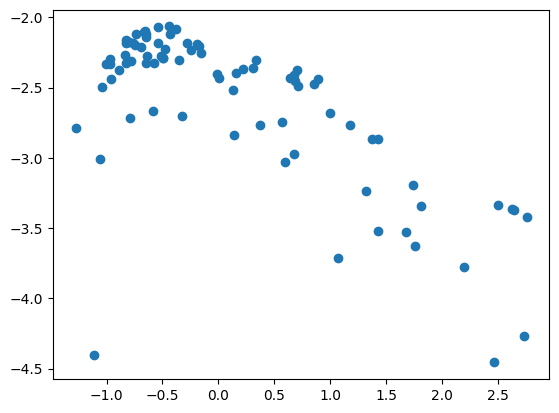

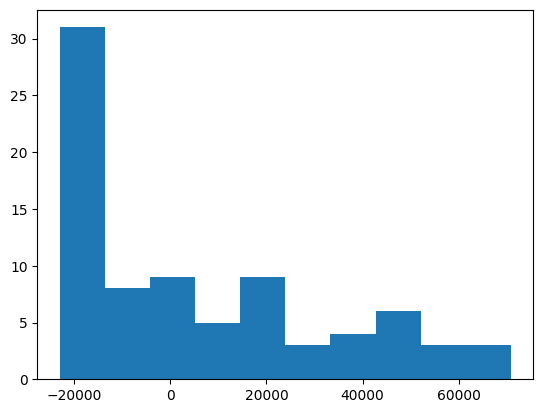



Building type: Single-family residential
Mean Squared Error: 131778504.68505517
MAE: 6899.9918
R^2 score for train set: 0.2764228841796559
R^2 score for test set: 0.28092413439091624


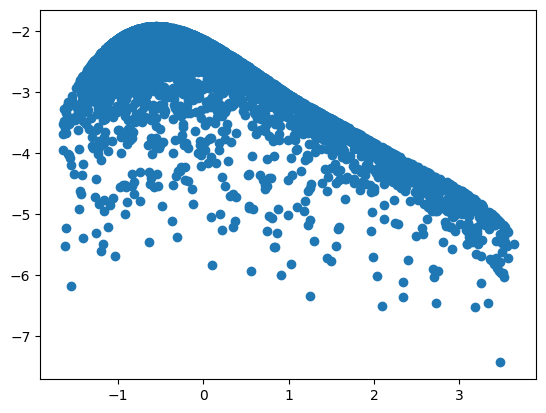

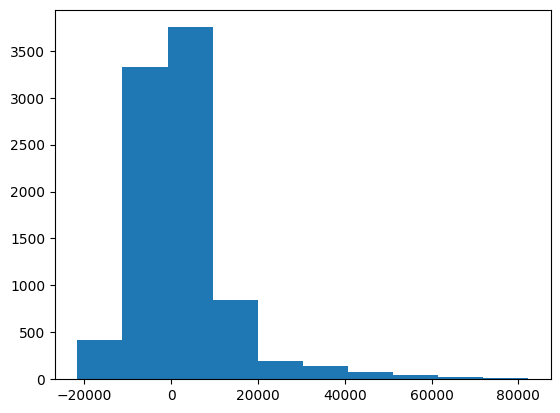

In [71]:
from sklearn.svm import SVR

#Grouping by the different building types
grouped_by_building_type = df1.groupby('Assumed_building_type')

print("Results for SVR - \n")
for building_type, group in grouped_by_building_type:
    # Selecting relevant features
    features = ['estimated_aspect_ratio', 'Estimated_capacity_factor']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Create and fit the SVR model
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model using mean squared error
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate mean absolute error
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (coefficient of determination)
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R-squared
    n_features = len(features)
    n_samples = len(y_test)
    r2_train = r2_score(y_train, model.predict(X_train))
        
    print(f"Building type: {building_type}")
    print(f'Mean Squared Error: {mse}')
    print(f"MAE: {mae:.4f}")
    print(f"R^2 score for train set: {r2_train}")
    print(f"R^2 score for test set: {r2}")
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Estimate the KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_test)
    log_dens = kde.score_samples(X_test)

    # Plot the KDE and data points
    plt.scatter(X_test[:, 0], log_dens)
    plt.show()

    # Plot the residuals
    plt.hist(residuals)
    plt.show()
    
    print("\n")

**c. Random Forest**

Results for Random forest - 

Building type: Commercial
Mean Squared Error: 309524026.38936424
MAE: 11463.0006
R^2 score for train set: 0.9334802892431114
R^2 score for train set 0.4906883826150328




C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Building type: Commercial
Optimal capacity factor: 0.23 square feet
Optimal aspect ratio: 0.30 square feet
Optimal energy generation: 14893.08 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

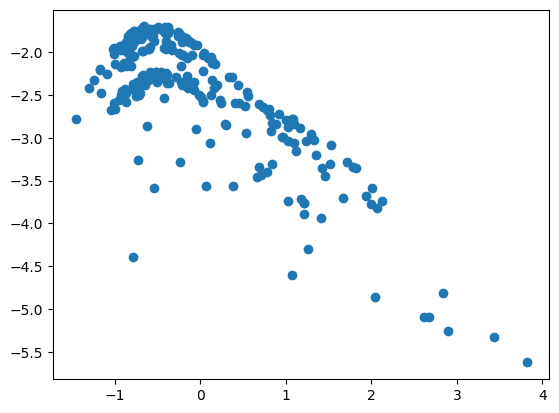

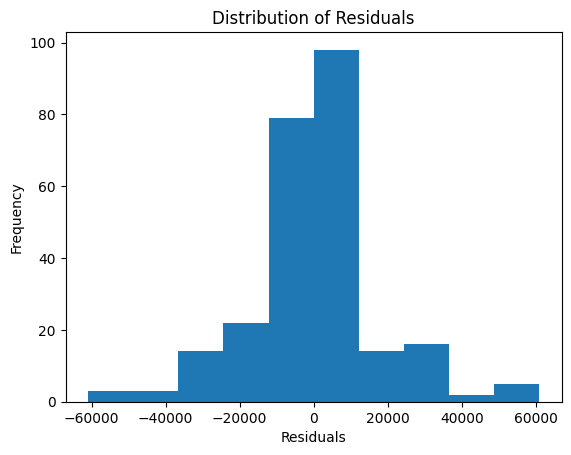



Building type: Hotels
Mean Squared Error: 390802286.2820953
MAE: 13551.7207
R^2 score for train set: 0.9239619606176004
R^2 score for train set 0.38646986056848187


Building type: Hotels
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 20509.96 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

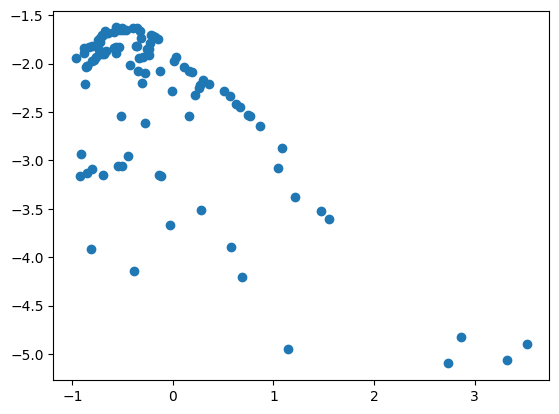

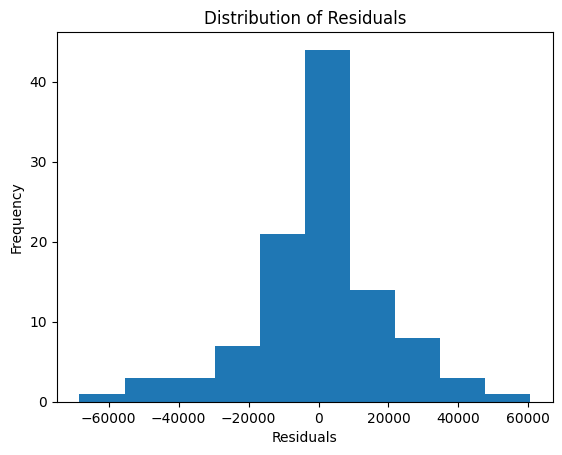



Building type: Industrial
Mean Squared Error: 191539230.76773542
MAE: 8588.1088
R^2 score for train set: 0.9239169688344282
R^2 score for train set 0.5413864750808666


Building type: Industrial
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 19801.14 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

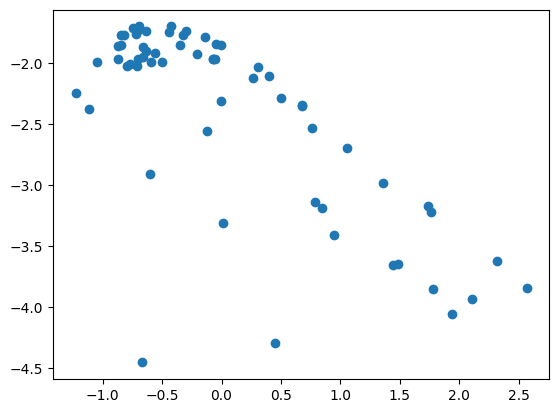

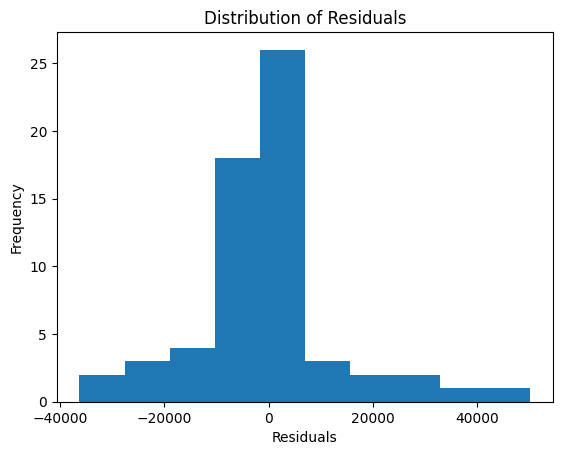



Building type: Multi-family residential
Mean Squared Error: 236706128.36565128
MAE: 10137.3945
R^2 score for train set: 0.9220487603918892
R^2 score for train set 0.46545075841384775


Building type: Multi-family residential
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 12663.99 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

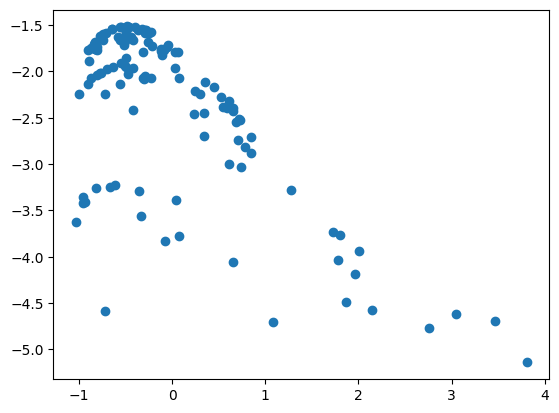

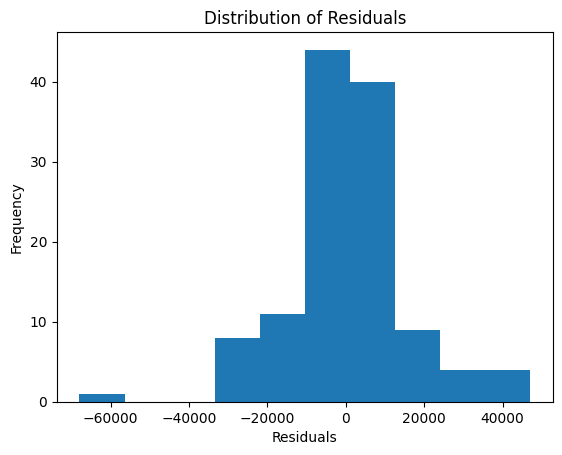



Building type: Public
Mean Squared Error: 303921400.71169966
MAE: 11419.0600
R^2 score for train set: 0.9098263635260337
R^2 score for train set 0.38049036155663174


Building type: Public
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 11999.00 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

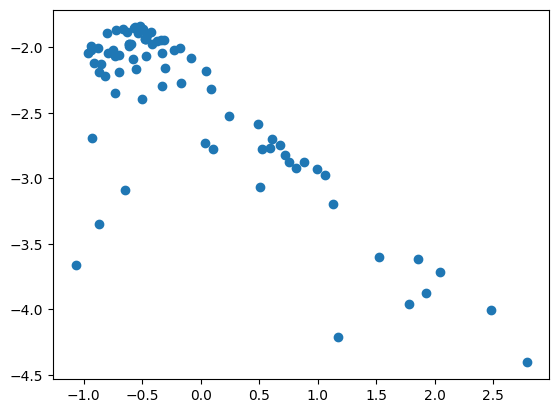

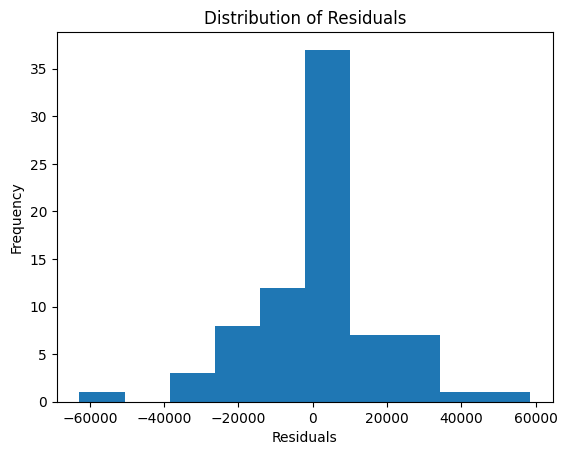



Building type: Public health facilities
Mean Squared Error: 197011114.4401874
MAE: 6475.3681
R^2 score for train set: 0.9188885102491465
R^2 score for train set 0.4789634051965601


Building type: Public health facilities
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 17871.77 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

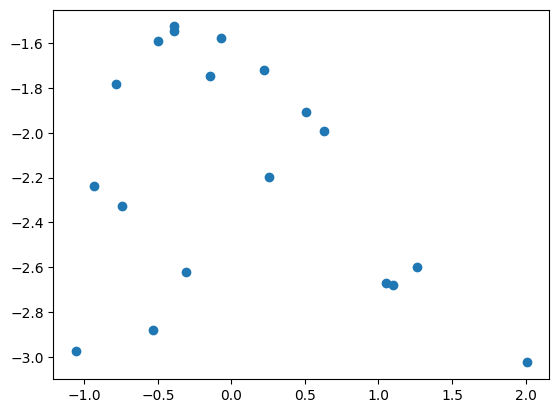

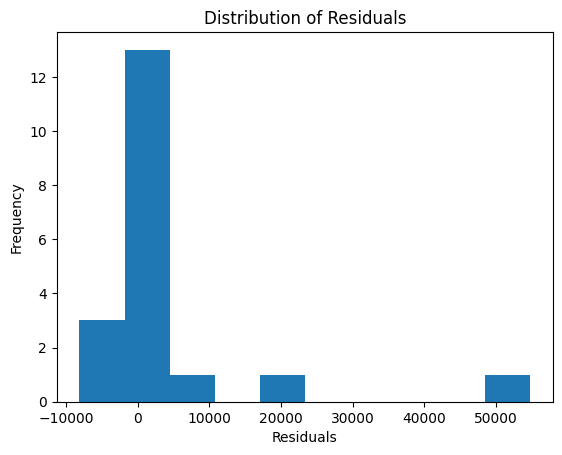



Building type: Schools
Mean Squared Error: 279240921.05913275
MAE: 10200.2621
R^2 score for train set: 0.9459398337583849
R^2 score for train set 0.6016890493158419


Building type: Schools
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.00 square feet
Optimal energy generation: 13722.67 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

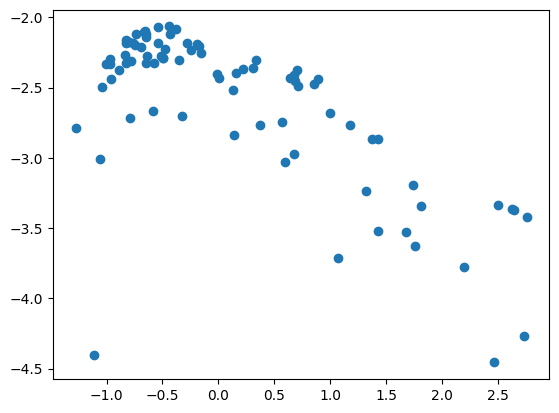

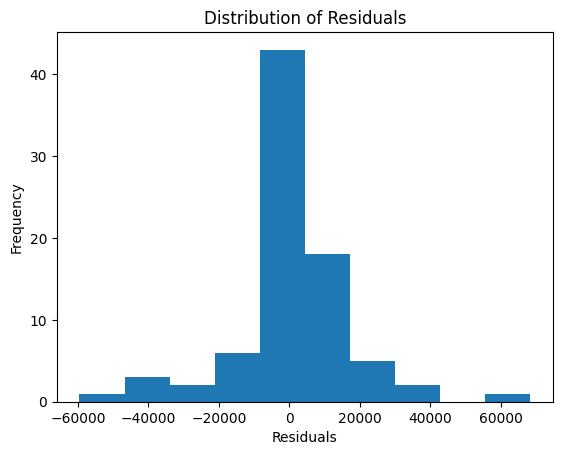



Building type: Single-family residential
Mean Squared Error: 105409425.92162904
MAE: 6244.8274
R^2 score for train set: 0.9201633840841332
R^2 score for train set 0.4248123063081921




C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Building type: Single-family residential
Optimal capacity factor: 0.25 square feet
Optimal aspect ratio: 1.17 square feet
Optimal energy generation: 12726.27 kWh/year


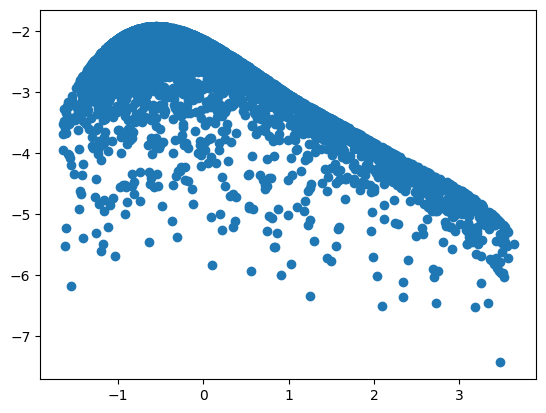

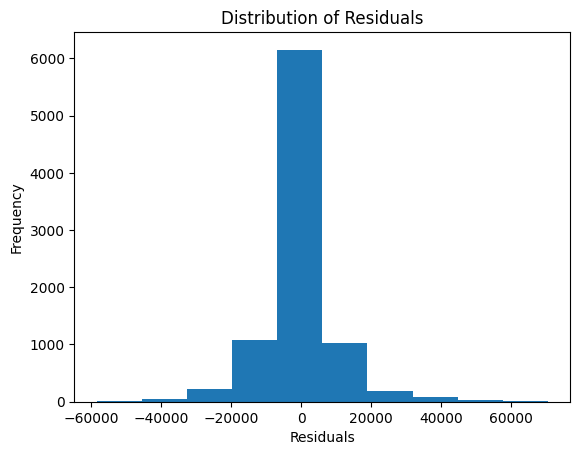

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KernelDensity

# Group by building type
grouped_by_building_type = df1.groupby('Assumed_building_type')

print("Results for Random forest - \n")
for building_type, group in grouped_by_building_type:
    # Selecting relevant features
    features = ['estimated_aspect_ratio','Estimated_capacity_factor']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Create and train the Random Forest Regressor model
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate mean squared error and R-squared as performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, rf.predict(X_train))
    
    print(f"Building type: {building_type}")
    print("Mean Squared Error:", mse)
    print(f"MAE: {mae:.4f}")
    print(f"R^2 score for train set: {r2_train}")
    print("R^2 score for train set", r2)
    print("\n")
    
    # Optimization using the trained model
    # Define a function to calculate the expected energy generation
    def expected_energy_generation(estimated_capacity_factor_per, aspect_ratio):
        features_scaled = scaler.transform([[estimated_capacity_factor_per, aspect_ratio]])
        return rf.predict(features_scaled)[0]
    
        # Define constraints (e.g., minimum surface area, maximum tilt angle)
    constraints = [
        {'type': 'ineq', 'fun': lambda x: x[0] - 0.25},
        # Minimum aspect ratio: 10 square meters
        {'type': 'ineq', 'fun': lambda x: x[1] - 1},
    ]

    # Optimization algorithm (e.g., genetic algorithm, particle swarm optimization)
    from scipy.optimize import minimize

    # Define the objective function to maximize
    def objective_function(x):
        estimated_capacity_factor_per, aspect_ratio = x
        return expected_energy_generation(estimated_capacity_factor_per, aspect_ratio)

    # Initialize the optimization
    initial_guess = [0.23 , 0.25]

    # Run the optimization
    optimization_result = minimize(objective_function, initial_guess, method='SLSQP', constraints=constraints)

    # Extract the optimal configuration
    optimal_capacity_factor = optimization_result.x[0]
    optimal_aspect_ratio = optimization_result.x[1]

    # Calculate the expected energy generation with the optimal configuration
    optimal_energy_generation = expected_energy_generation(optimal_capacity_factor, optimal_aspect_ratio)

    # Print the results
    print(f"Building type: {building_type}")
    print(f"Optimal capacity factor: {optimal_capacity_factor:.2f} square feet")
    print(f"Optimal aspect ratio: {optimal_aspect_ratio:.2f} square feet")
    print(f"Optimal energy generation: {optimal_energy_generation:.2f} kWh/year")
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Estimate the KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_test)
    log_dens = kde.score_samples(X_test)

    # Plot the KDE and data points
    plt.scatter(X_test[:, 0], log_dens)
    plt.show()

    # Plot the distribution of residuals
    plt.hist(residuals)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

    print("\n")

**d. Xtreme Gradient Boosting (XGB)**

Results for XGB - 

Building type: Commercial
Mean Squared Error: 384554842.37223136
MAE: 12327.2562
R^2 for train set: 0.967793038941775
R^2 for train set:  0.3672276397198214


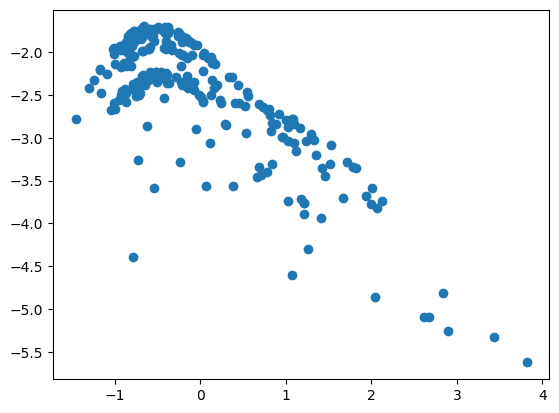

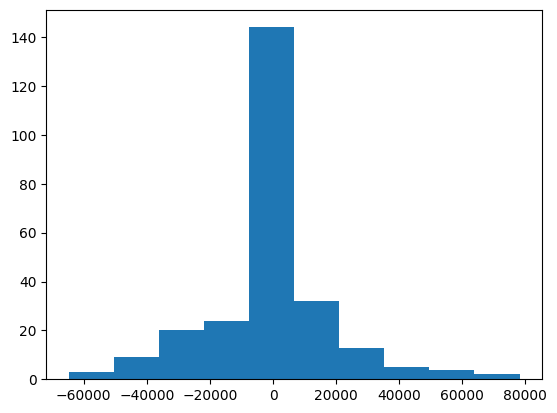



Building type: Hotels
Mean Squared Error: 405064856.95731646
MAE: 12990.7675
R^2 for train set: 0.9774574588635173
R^2 for train set:  0.3640786994054588


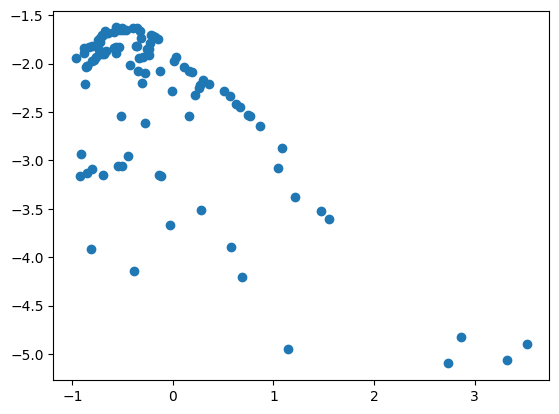

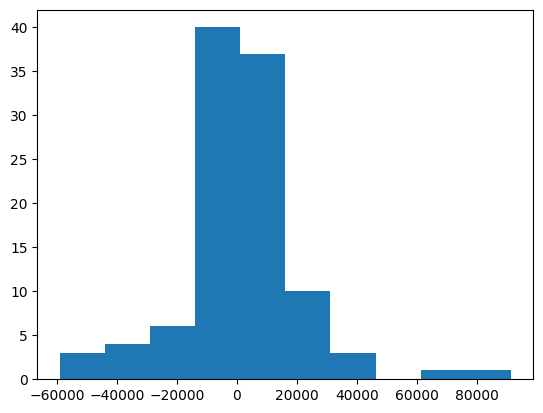



Building type: Industrial
Mean Squared Error: 223393227.40861422
MAE: 9083.9201
R^2 for train set: 0.9995979874529877
R^2 for train set:  0.4651165975018423


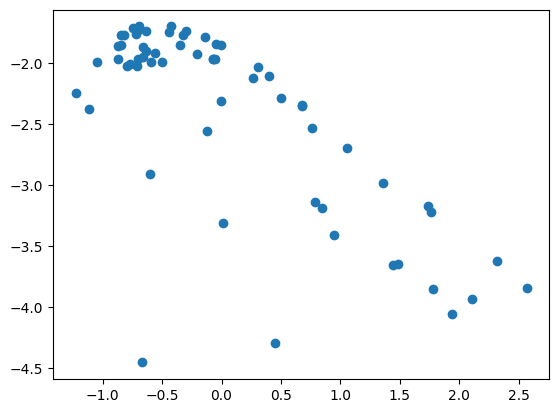

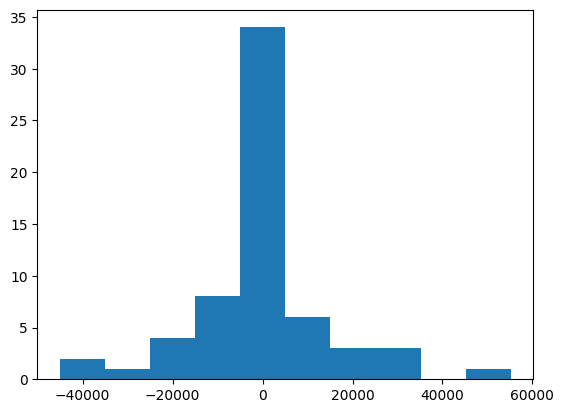



Building type: Multi-family residential
Mean Squared Error: 271867603.3048785
MAE: 10964.2005
R^2 for train set: 0.9955482944940509
R^2 for train set:  0.38604622465044625


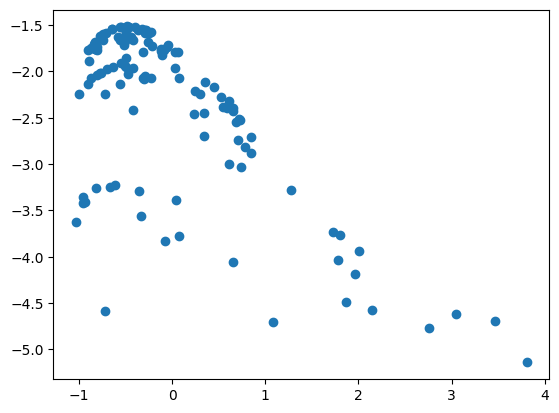

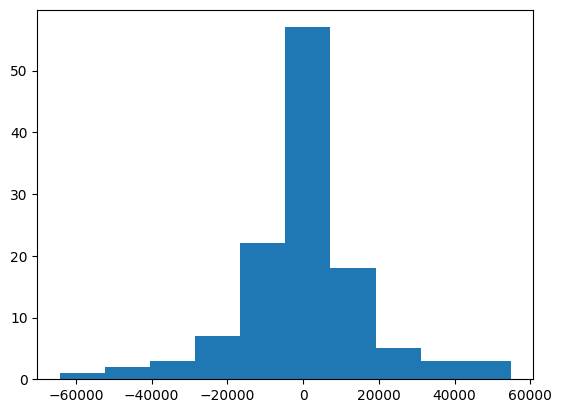



Building type: Public
Mean Squared Error: 389393793.91908693
MAE: 12806.4908
R^2 for train set: 0.9984057704497498
R^2 for train set:  0.2062644883907362


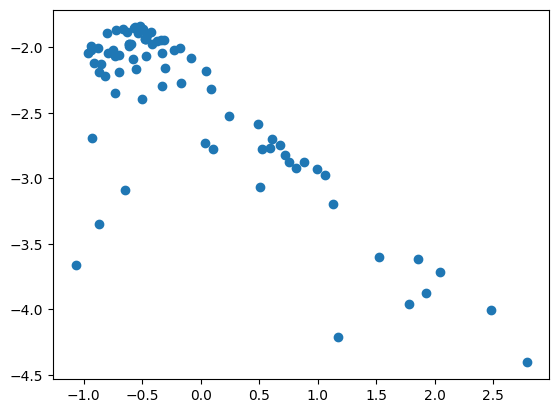

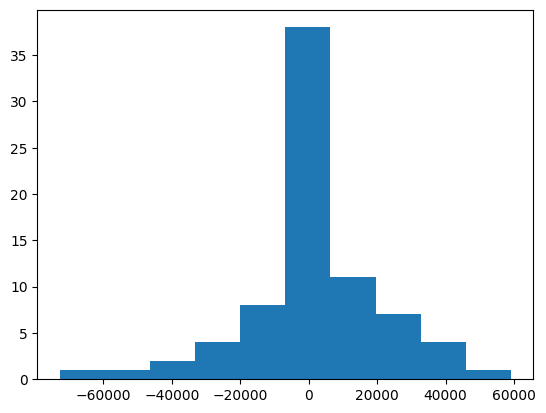



Building type: Public health facilities
Mean Squared Error: 337290673.5395929
MAE: 8567.9626
R^2 for train set: 0.9999999831520571
R^2 for train set:  0.10796512928013946


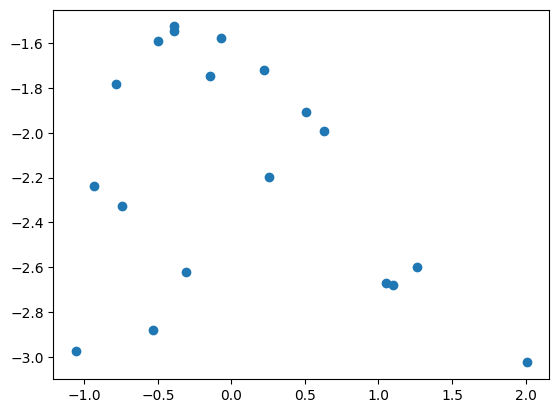

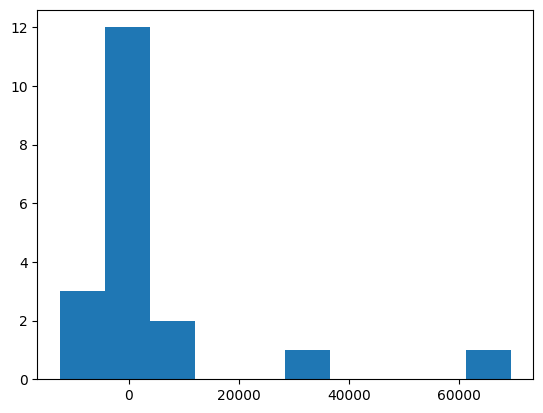



Building type: Schools
Mean Squared Error: 312523899.962069
MAE: 11446.6064
R^2 for train set: 0.9988771732060786
R^2 for train set:  0.5542140054786173


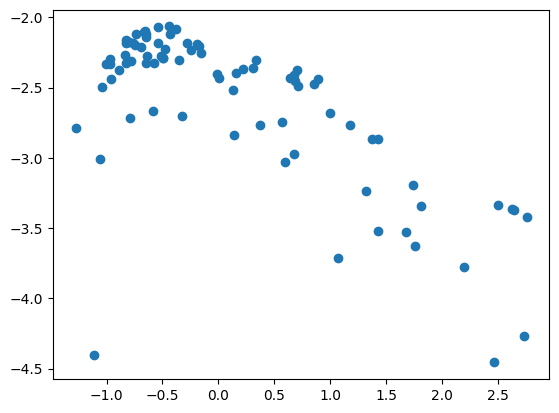

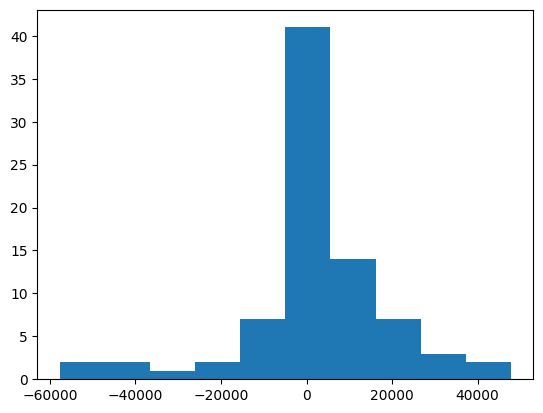



Building type: Single-family residential
Mean Squared Error: 94382610.05098799
MAE: 5892.9231
R^2 for train set: 0.6354150699940833
R^2 for train set:  0.4849823407614091


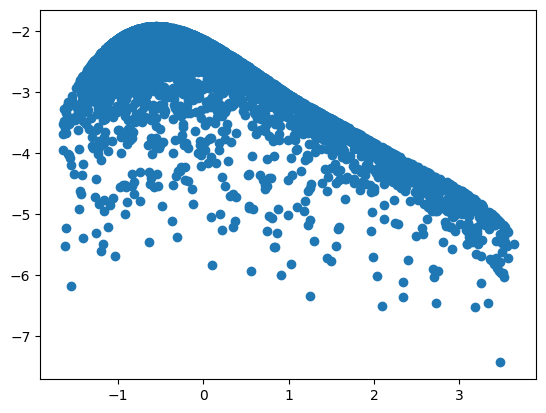

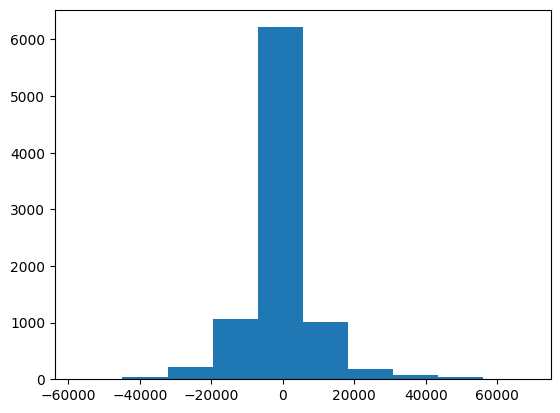

In [72]:
from xgboost import XGBRegressor

# Group by building type
grouped_by_building_type = df1.groupby('Assumed_building_type')

print("Results for XGB - \n")
# Optimization for each building type
for building_type, group in grouped_by_building_type:
    # Selecting relevant features
    features = ['estimated_aspect_ratio','Estimated_capacity_factor_%']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Initialize the XGBoost Regressor
    xgb_regressor = XGBRegressor()

    # Train the regressor
    xgb_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_regressor.predict(X_test)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, xgb_regressor.predict(X_train))

    print(f"Building type: {building_type}")
    print(f'Mean Squared Error: {mse}')
    print(f"MAE: {mae:.4f}")
    print(f"R^2 for train set: {r2_train}")
    print("R^2 for train set: ", r2)
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Estimate the KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_test)
    log_dens = kde.score_samples(X_test)

    # Plot the KDE and data points
    plt.scatter(X_test[:, 0], log_dens)
    plt.show()

    # Plot the residuals
    plt.hist(residuals)
    plt.show()
    print("\n")   

**e. Sequential neural Network (SNN)**

In [74]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Group by building type
grouped_by_building_type = df1.groupby('Assumed_building_type')

print("Results for SNN - \n")
# Optimization for each building type
for building_type, group in grouped_by_building_type:
    # Selecting relevant features
    features = ['estimated_aspect_ratio', 'Estimated_capacity_factor']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define the neural network architecture
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    #r2_train = r2_score(X_train, model.predict(X_train))

    print("Neural Network")
    print(f"Building type: {building_type}")
    print(f'Mean Squared Error: {mse}')
    print(f"MAE: {mae:.4f}")
    #print(f"R^2 for train set: {r2_train}")
    print("R^2 for test set:", r2)

    print("\n")

Results for SNN - 

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1304912128.0000 - mae: 27885.3633
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 1304282112.0000 - mae: 27873.9121
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1300701184.0000 - mae: 27817.2773
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 1287846528.0000 - mae: 27618.5469
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 1253804160.0000 - mae: 27104.8594
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 1179689472.0000 - mae: 26018.6895
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 1048067968.0000 - mae: 24067.5039
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 854162752.0000 - mae: 21030.1660
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 629450624.0000 - mae: 17108.7520
Epoch 10/10
8/8 [===========

**FINDINGS -**

**We have used the models like Linear Regression, Support Vector for Regression, Random forest, Xtreme Gradient Boosting, and Sequential Neural Network algorithms. From all the models, we have identified that every model has an R2 score higher for the train data than the R2 score for test data which indicates that the models are overfitting.**

**Of all the algorithms used, Random forest has yielded the best results. Hence, to perform optimization, we have chosen RFR. The optimization technique used is SLSQP.**

**Our data has these average values -**

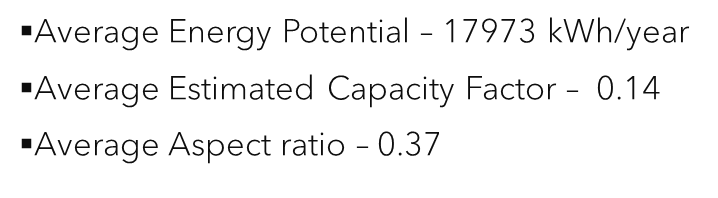

**We have finded that the optimal values can be-**

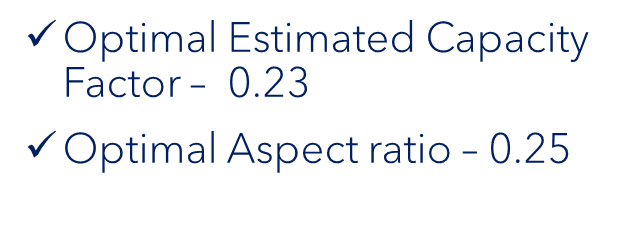

**Our energy potential per year (kWh/year) that could be maximized to the below extent for the optimal values chosen -**

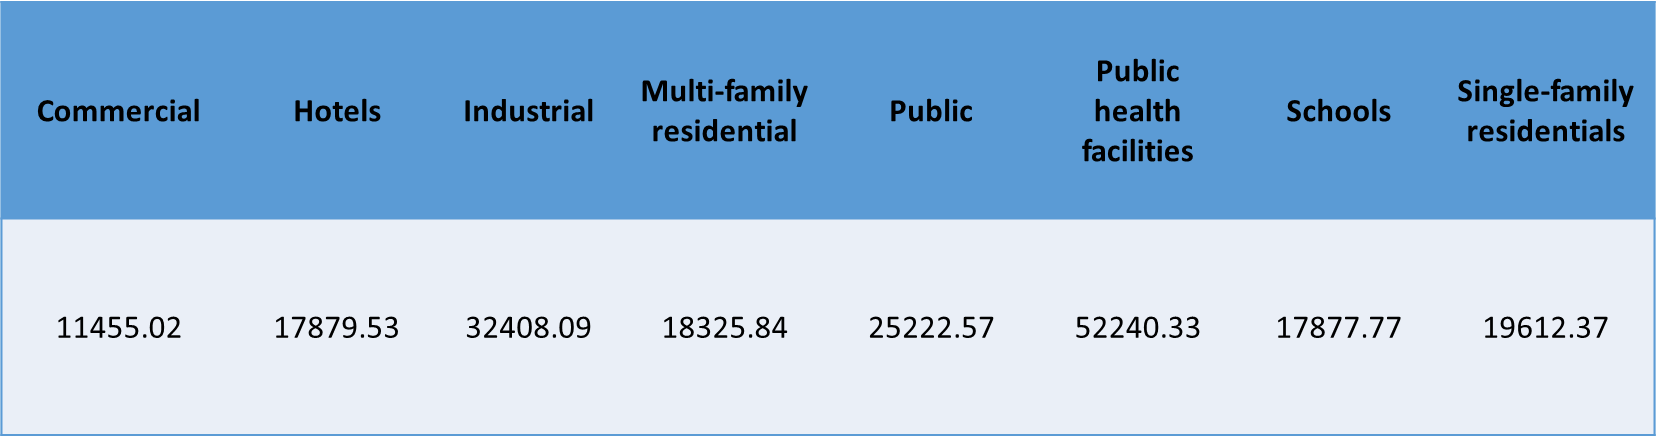

We have also plotted the Kernel Density Estimation scatter plot to visualize the general distribution of data. We have also analyzed th residual from our models. It helped us assess the model's fit and identify potential biases or overfitting.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# RESEARCH PROBLEM 2

**What is the relationship between estimated tilt, building height, and energy generation potential?**

To understand feature importance to match with the theoretical concept of solar energy generation based on our tilt and height, we are going to run different regression algorithms on our selected features **i.e., estimated_tilt and estimated_building_height.** 

**a. XGB Regressor -**

In [32]:
from xgboost import XGBRegressor

# Assuming df is your DataFrame containing the dataset
X = df1[['Estimated_tilt', 'Estimated_building_height']]
y = df1['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBRegressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Get feature importances
feature_importance = model_xgb.feature_importances_

# Print the feature importances
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')


Feature Importances:
Estimated_tilt: 0.4493822157382965
Estimated_building_height: 0.5506177544593811


In [65]:
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

# Assuming df is your DataFrame containing the dataset
X = df1[['Estimated_tilt', 'Estimated_building_height']]
y = df1['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(svr, X_test, y_test, scoring='neg_mean_squared_error')

# Print the feature importances
feature_names = X.columns
for feature, importance in zip(feature_names, perm_importance.importances_mean):
    print(f'{feature}: {importance}')

Estimated_tilt: 1352522.6813211918
Estimated_building_height: 1682915.5833282173


**Gradient Boosting -**

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame containing the dataset
X = df1[['Estimated_tilt', 'Estimated_building_height']]
y = df1['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting regressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)

# Get feature importances from the model
feature_importance = gb.feature_importances_

# Print the feature importances
feature_names = X.columns
for feature, importance in zip(feature_names, feature_importance):
    print(f'{feature}: {importance}')

Estimated_tilt: 0.3577737649492647
Estimated_building_height: 0.6422262350507353


**Random Forest Regressor -**

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the dataset
X = df1[['Estimated_tilt', 'Estimated_building_height']]
y = df1['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Get feature importances
feature_importance = model_rf.feature_importances_

# Print the feature importances
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')

Feature Importances:
Estimated_tilt: 0.5259549301770512
Estimated_building_height: 0.47404506982294875


**FINDINGS -**

**We have used the models like Random forest, Xtreme Gradient Boosting, Gradient Boosting algorithms to calculate feature importance.**

**Of all the algorithms used, Random forest has yielded the best results.**

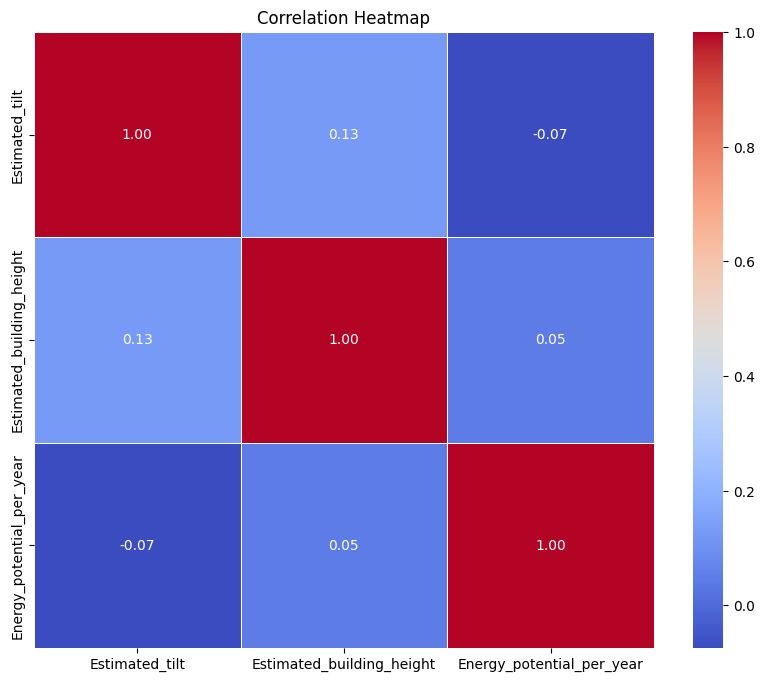

In [32]:
correlation_matrixx = df1[['Estimated_tilt', 'Estimated_building_height', 'Energy_potential_per_year']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrixx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

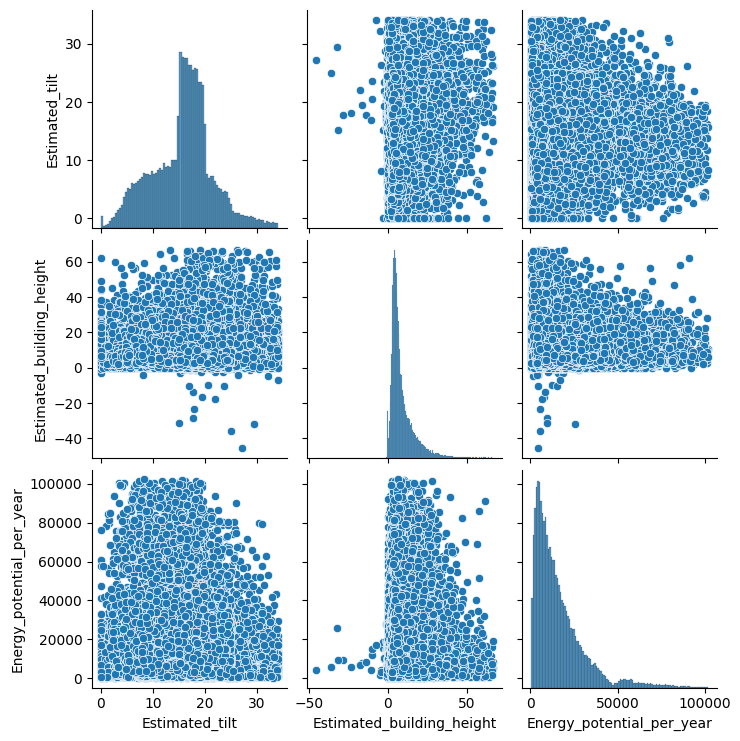

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df1[['Estimated_tilt', 'Estimated_building_height', 'Energy_potential_per_year']])
plt.show()


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Research Question 3 

**Can we develop a predictive model to estimate yearly electricity generation based on building features and geographical location?**

We need to calculate the electricity generation per year from our data and include it in our analysis as our target variable for this problem becomes **electricity generation.** We are calculating using the formula enery potential * capacity factor. 

In [48]:
df1.loc[:,'electricity_generation'] = df1['Energy_potential_per_year'] * df1['Estimated_capacity_factor_%']

In [49]:
df1.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Assumed_building_type_encoded,no_of_panels,Estimated_capacity_factor_%,estimated_width,estimated_length,estimated_aspect_ratio,electricity_generation
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844,7,2.0,12.7975,0.516077,97.020313,0.531927,82114.262925
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159,7,2.0,12.9911,0.540653,84.397929,0.640600,80695.516760
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.087096,7,1.0,13.3000,0.458347,68.354380,0.670545,49273.973000
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582705,7,1.0,13.4255,0.496175,57.963392,0.856015,49941.517450
5,150ccd3a-939b-4a9e-9101-629a0120fbf5,Grenada,102.85,61.35,11.90,16216.01,Single-family residential,19.60,14.39,1362.37,19.949715,7,4.0,13.6237,0.596500,172.422535,0.345952,220922.055437


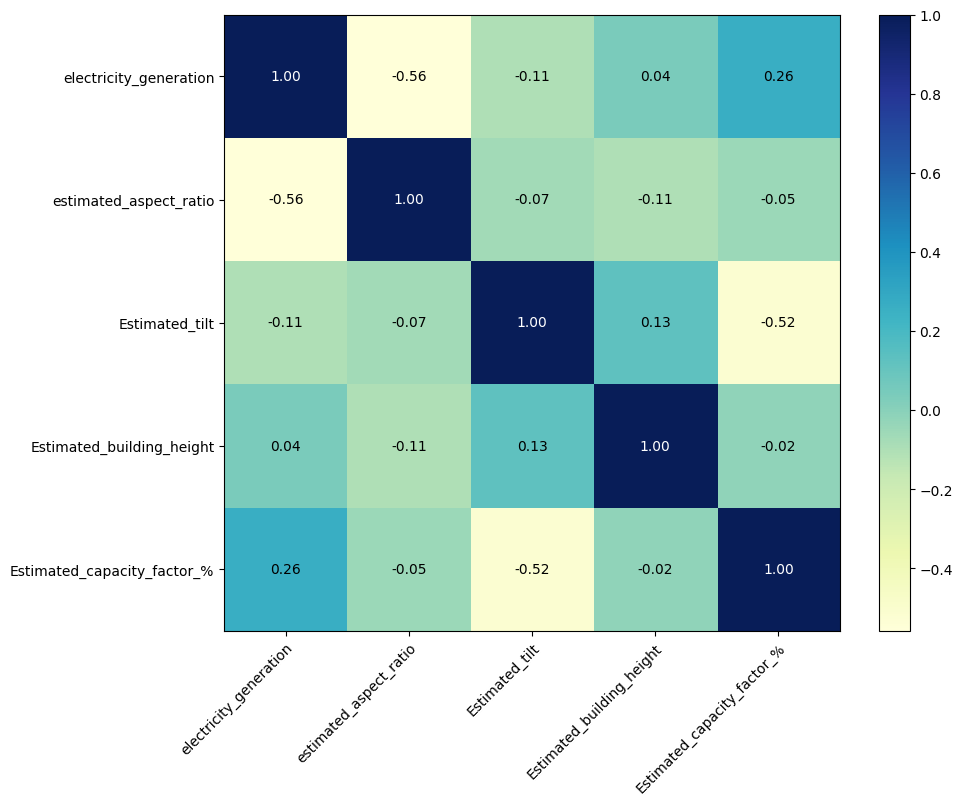

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import numpy as np
from mlxtend.plotting import heatmap

#cols = df1.columns # List of colmuns of dataframe GateArrivalDelay df
cols = ['electricity_generation', 'estimated_aspect_ratio', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor_%']

cm = np.corrcoef(df1[cols].values.T) # Calculate Pearson correlation
hm = heatmap(cm, figsize=(10,8), row_names=cols, column_names=cols, cmap="YlGnBu") # ,!Represent correlation by a heat map
plt.show()

Now that we have performed EDA, we are going to run different regression algorithms on our selected features **i.e., estimated_aspect_ratio, estimated_tilt and estimated_capacity_factor_%.** 

**a. Linear Regression -**

Mean Squared Error: 33947064777.287563
Mean Absolute Error: 118981.89348064082
R-squared (R2) for train data:  0.3651711792422633
R-squared (R2) for test data:  0.3707228583624006


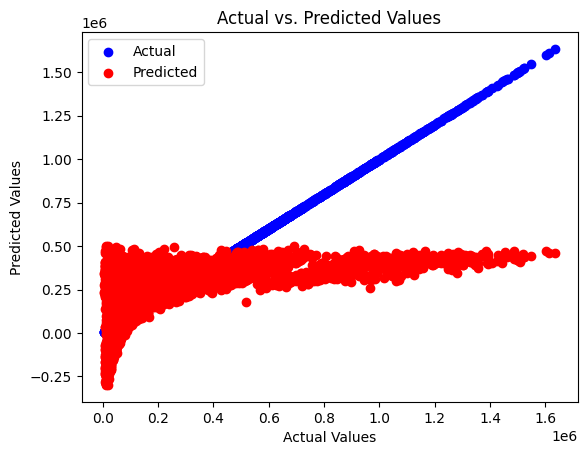

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error

# Define features (independent variables) and target (dependent variable)
X = df1[["Estimated_capacity_factor_%", "estimated_aspect_ratio", "Estimated_tilt"]]
y = df1["electricity_generation"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) for train data: ", r2_train)
print("R-squared (R2) for test data: ", r2)

# Define colors for true and predicted values
true_color = 'blue'
pred_color = 'red'

# Create separate scatter plots for true and predicted values
plt.scatter(y_test, y_test, color=true_color, label="Actual")
plt.scatter(y_test, y_pred, color=pred_color, label="Predicted")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

**b. Random Forest -**

Mean Squared Error: 25801079460.354816
Mean Absolute Error: 95335.3475841596
R-squared (R2) for train data:  0.9310045261269503
R-squared (R2) for test data:  0.5217250846135173


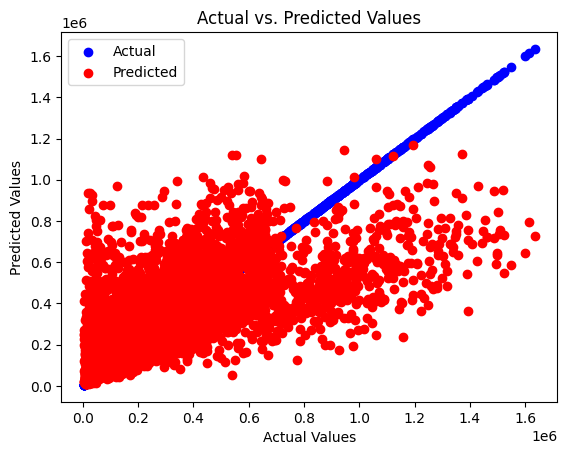

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (independent variables) and target variable
X = df1[["Estimated_capacity_factor_%", "estimated_aspect_ratio", "Estimated_tilt"]]
y = df1["electricity_generation"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Calculate mean squared error and R-squared as performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) for train data: ", r2_train)
print("R-squared (R2) for test data: ", r2)

# Define colors for true and predicted values
true_color = 'blue'
pred_color = 'red'

# Create separate scatter plots for true and predicted values
plt.scatter(y_test, y_test, color=true_color, label="Actual")
plt.scatter(y_test, y_pred, color=pred_color, label="Predicted")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

**c. Decision Tree -**

Mean Squared Error: 47129720438.73446
Mean Absolute Error: 126368.41076459152
R-squared (R2) for train data:  1.0
R-squared (R2) for test data:  0.1263558143115644


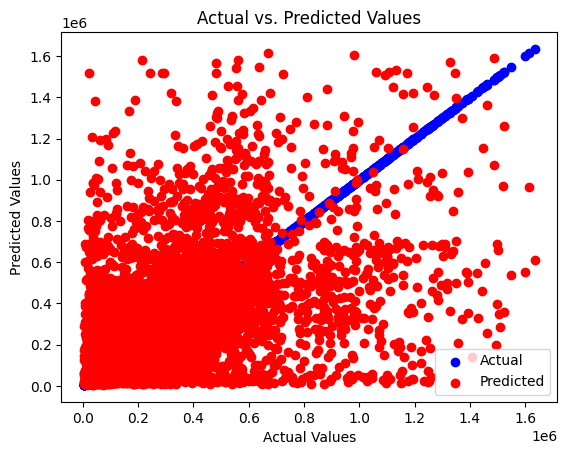

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define features (independent variables) and target (dependent variable)
X = df1[["Estimated_capacity_factor_%", "estimated_aspect_ratio", "Estimated_tilt"]]
y = df1["electricity_generation"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) for train data: ", r2_train)
print("R-squared (R2) for test data: ", r2)

# Define colors for true and predicted values
true_color = 'blue'
pred_color = 'red'

# Create separate scatter plots for true and predicted values
plt.scatter(y_test, y_test, color=true_color, label="Actual")
plt.scatter(y_test, y_pred, color=pred_color, label="Predicted")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

**d. Gradient Boosting -**

Mean Absolute Error:  90690.04726303165
Mean Squared Error: 23162218841.051178
R-squared (R2) for train data:  0.5737126200731888
R-squared (R2) for test data:  0.570641675152044


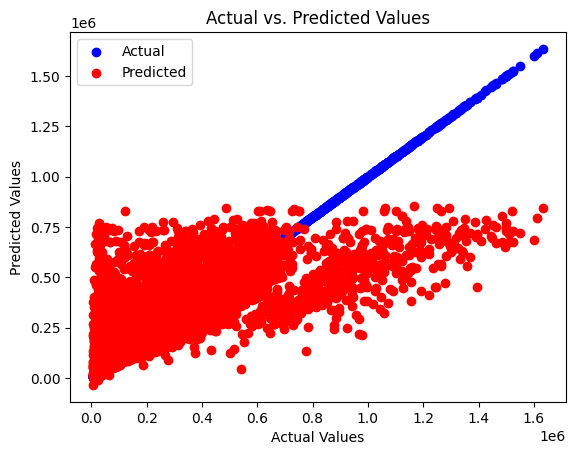

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Drop non-numeric columns
X = X = df1[["Estimated_capacity_factor_%", "estimated_aspect_ratio", "Estimated_tilt"]]

# The target variable
y = df1['electricity_generation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Train the regressor
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, gb_regressor.predict(X_train))

print("Mean Absolute Error: ", mae)
print(f'Mean Squared Error: {mse}')
print("R-squared (R2) for train data: ", r2_train)
print("R-squared (R2) for test data: ", r2)

# Define colors for true and predicted values
true_color = 'blue'
pred_color = 'red'

# Create separate scatter plots for true and predicted values
plt.scatter(y_test, y_test, color=true_color, label="Actual")
plt.scatter(y_test, y_pred, color=pred_color, label="Predicted")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

**e. Xtreme Gradient Booster Regressor -**

Mean Squared Error: 25155312180.43221
Mean Absolute Error: 92724.42560188212
R-squared (R2) for train data:  0.7188003185110182
R-squared (R2) for test data:  0.5336956803259534


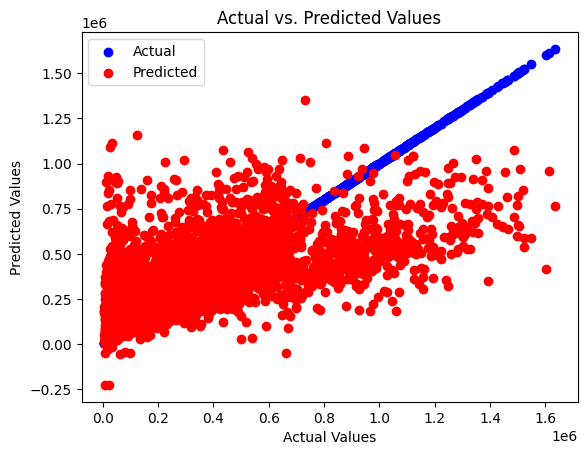

In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop non-numeric columns
X = X = df1[["Estimated_capacity_factor_%", "estimated_aspect_ratio", "Estimated_tilt"]]
# The target variable
y = df1['electricity_generation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, xgb_regressor.predict(X_train))

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print("R-squared (R2) for train data: ", r2_train)
print("R-squared (R2) for test data: ", r2)

# Define colors for true and predicted values
true_color = 'blue'
pred_color = 'red'

# Create separate scatter plots for true and predicted values
plt.scatter(y_test, y_test, color=true_color, label="Actual")
plt.scatter(y_test, y_pred, color=pred_color, label="Predicted")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

**FINDINGS -**

**We have used the models like Linear Regression, Random forest, Decision tree, Gradient Boosting, and Xtreme Gradient Boosting algorithms. From all the models, we have identified that every model has an R2 score higher for the train data than the R2 score for test data which indicates that the models are overfitting.**

**Of all the algorithms used, Gradient Boosting model has yielded the best results.**

**Hence, to predict electricity generation per year values, we will consider Gradient Boosting regression model for future analysis.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# CONCLUSION -

1. With the dataset we have, we were able to achieve moderate results for our research problems.

2. Our future scope includes identifying similar datasets and merging them with the existing ones to train our models even more and achieve better accuracy. 

3. We also aim to understand why certain models yielded negative r2 score. 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# REFERENCES - 

1. Dataset source - https://energydata.info/dataset/grenada-rooftop-solar-potential-mapping 

2. Research paper which led us to add features like aspect rato - https://www.sciencedirect.com/science/article/pii/S2666123320300921


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**